In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import sys
import zipfile
from matplotlib import colormaps
import os

In [4]:
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    import os
    working_dir = "/content/drive/MyDrive/AI books/tensorflow course/project RNA"
    os.chdir(working_dir)
    print(f"Current working directory: {os.getcwd()}")


In [14]:
import zipfile

with zipfile.ZipFile('stanford-rna-3d-folding.zip', 'r') as zip_ref:
    zip_ref.extractall('stanford_rna_data')

In [ ]:
sample_df = pd.read_csv('src/data/stanford-rna-3d-folding/sample_submission.csv')
sample_df.head(10)

,ID,resname,resid,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5
0,R1107_1,G,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,R1107_2,G,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,R1107_3,G,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,R1107_4,G,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,R1107_5,G,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,R1107_6,C,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,R1107_7,C,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,R1107_8,A,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,R1107_9,C,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,R1107_10,A,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sample_df = pd.read_csv('src/data/stanford-rna-3d-folding/test_sequences.csv')
sample_df.head(100)

,target_id,sequence,temporal_cutoff,description,all_sequences
0,R1107,GGGGGCCACAGCAGAAGCGUUCACGUCGCAGCCCCUGUCAGCCAUU...,2022-05-28,CPEB3 ribozyme\nHuman\nhuman CPEB3 HDV-like ri...,>7QR4_1|Chain A|U1 small nuclear ribonucleopro...
1,R1108,GGGGGCCACAGCAGAAGCGUUCACGUCGCGGCCCCUGUCAGCCAUU...,2022-05-27,CPEB3 ribozyme\nChimpanzee\nChimpanzee CPEB3 H...,">7QR3_1|Chains A, B|U1 small nuclear ribonucle..."
2,R1116,CGCCCGGAUAGCUCAGUCGGUAGAGCAGCGGCUAAAACAGCUCUGG...,2022-06-04,Cloverleaf RNA\nPoliovirus\nCrystal Structure ...,">8S95_1|Chain A[auth C]|Lysine tRNA scaffold,P..."
3,R1117v2,UUGGGUUCCCUCACCCCAAUCAUAAAAAGG,2022-06-03,PreQ1 class I type III riboswitch\nK. pneumoni...,">8FZA_1|Chains A, B|PreQ1 Riboswitch (30-MER)|..."
4,R1126,GGAAUCUCGCCCGAUGUUCGCAUCGGGAUUUGCAGGUCCAUGGAUU...,2022-06-11,Traptamer\nSynthetic\nAdditional Information: ...,>8TVZ_1|Chain A[auth C]|RNA (363-MER)|syntheti...
5,R1128,GGAAUAUCGUCAUGGUGAUUCGUCACCAUGAGGCUAGAUCUCAUAU...,2022-06-10,6WJ\nSingle-stranded Paranemic Crossover RNA T...,>8BTZ_1|Chain A|RNA Paranemic croosover triang...
6,R1136,GGAUACGUCUACGCUCAGUGACGGACUCUCUUCGGAGAGUCUGACA...,2022-06-18,Apta-FRET\nAdditional Information: Info...,>7ZJ4_1|Chain A[auth E]|brocolli-pepper aptame...
7,R1138,GGGAGAGUACUAUUCAGAUGCAGACCGCAAGUUCAGAGCGGUUUGC...,2022-06-24,6HBC-Young\nAdditional Information: Thi...,>7PTK_1|Chain A[auth B]|RNA|synthetic construc...
8,R1149,GGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGUUUCG...,2022-07-02,SARS-CoV-2 SL5\nAdditional Information: ...,>8UYS_1|Chain A|SARS-CoV-2 RNA SL5 domain.|Sev...
9,R1156,GGAGCAUCGUGUCUCAAGUGCUUCACGGUCACAAUAUACCGUUUCG...,2022-07-07,BtCoV-HKU5 SL5\nBtCoV-HKU5 5 proximal stem-loo...,>8UYE_1|Chain A|BtCoV-HKU5 5' proximal stem-lo...


In [11]:
train_label_raw = pd.read_csv("src/data/stanford-rna-3d-folding/train_labels.csv")
train_label_raw.describe()


,resid,x_1,y_1,z_1
count,137095.000000,130950.000000,130950.000000,130950.000000
mean,897.255633,80.447315,84.040727,98.611226
std,1014.321987,147.422319,114.928902,119.410665
min,1.000000,-821.085999,-449.414001,-333.403992
25%,61.000000,-1.115750,-4.890750,2.218500
50%,481.000000,62.651501,67.901501,72.938499
75%,1459.500000,178.809753,170.451996,184.531750
max,4298.000000,849.887024,889.507996,668.776978


In [12]:
train_label_raw.tail()

,ID,resname,resid,x_1,y_1,z_1
137090,8Z1F_T_82,U,82,NaN,NaN,NaN
137091,8Z1F_T_83,C,83,NaN,NaN,NaN
137092,8Z1F_T_84,A,84,NaN,NaN,NaN
137093,8Z1F_T_85,U,85,NaN,NaN,NaN
137094,8Z1F_T_86,A,86,NaN,NaN,NaN


In [8]:
train_sequences_df = pd.read_csv('src/data/stanford-rna-3d-folding/train_sequences.csv')


In [ ]:
print(f"\nShape of train_sequences_df: {train_sequences_df.shape}")

# Sequence Length Analysis
train_sequences_df['sequence_length'] = train_sequences_df['sequence'].apply(len)
print(f"\nSequence Length Summary:\n{train_sequences_df['sequence_length'].describe()}")
plt.figure(figsize=(7, 4))
sns.histplot(train_sequences_df['sequence_length'], bins=30, kde=False)
plt.title('Distribution of RNA Sequence Lengths')
plt.xlabel('Length'); plt.ylabel('Frequency'); plt.grid(True, alpha=0.3)
plt.show()


,resid,x_1,y_1,z_1
count,137095.000000,130950.000000,130950.000000,130950.000000
mean,897.255633,80.447315,84.040727,98.611226
std,1014.321987,147.422319,114.928902,119.410665
min,1.000000,-821.085999,-449.414001,-333.403992
25%,61.000000,-1.115750,-4.890750,2.218500
50%,481.000000,62.651501,67.901501,72.938499
75%,1459.500000,178.809753,170.451996,184.531750
max,4298.000000,849.887024,889.507996,668.776978


In [24]:
all_chars = set("".join(train_sequences_df['sequence']))
standard_bases = {'A', 'C', 'G', 'U'}
non_standard_chars = all_chars - standard_bases
print(f"\nUnique characters in sequences: {sorted(list(all_chars))}")
if non_standard_chars:
    print(f"Non-standard characters found: {non_standard_chars}")
else:
    print("Only standard RNA bases (A, C, G, U) found.")




Unique characters in sequences: ['-', 'A', 'C', 'G', 'U', 'X']
Non-standard characters found: {'-', 'X'}


In [13]:
def euclidean_distance(df):

    j = 0

    x1_first = df["x_1"].iloc[j]
    y1_first = df["y_1"].iloc[j]
    z1_first = df["z_1"].iloc[j]
    
    j = 1
    
    x1_second = df["x_1"].iloc[j]
    y1_second = df["y_1"].iloc[j]
    z1_second = df["z_1"].iloc[j]
    
    d_Euclidean = np.sqrt(np.power( (x1_second - x1_first), 2) + np.power( (y1_second - y1_first), 2) + np.power( (z1_second - z1_first), 2) )

    return d_Euclidean

In [14]:
euclidean_distance(train_label_raw)

np.float64(6.310061775397852)

In [15]:
def two_letter_identification(df, i):
    return df["resname"][i] + df["resname"][i+1]

two_letter_identification(train_label_raw, 0)

'GG'

In [16]:
L_index = list()
L_2_Letters = list()
L_2_distance = list()
L_data_distance = list()


# Go through the entire dataset row by row
for i in range(0, len(train_label_raw) - 1):

    # Check that the 2 consecutive C-1 atoms are part of the same RNA chain
    if train_label_raw["resid"].iloc[i] == (train_label_raw["resid"].iloc[(i+1)] - 1):

        # Store the index
        L_index.append(i)

        # Store the 2 consecutive letters 
        L_2_Letters.append(two_letter_identification(train_label_raw[i:(i+2)], i))

        # Store the Euclidean distance between the 2 consecutive letters
        L_2_distance.append(euclidean_distance(train_label_raw[i:(i+2)]))

        # Make a list of list containing the index, the 2 consecutive letters and the Euclidean distance
        L_data_distance.append([i, two_letter_identification(train_label_raw[i:(i+2)], i), euclidean_distance(train_label_raw[i:(i+2)])])

In [17]:
L_data_distance[:10]


[[0, 'GG', np.float64(6.310061775397852)],
 [1, 'GG', np.float64(5.284342306180009)],
 [2, 'GU', np.float64(5.651121685043785)],
 [3, 'UG', np.float64(5.23731038803021)],
 [4, 'GC', np.float64(5.232383177623559)],
 [5, 'CU', np.float64(5.522049491165077)],
 [6, 'UC', np.float64(6.0914411889269875)],
 [7, 'CA', np.float64(6.288483076392955)],
 [8, 'AG', np.float64(4.182648133729444)],
 [9, 'GU', np.float64(5.959896313912904)]]

In [18]:
df_data_distances_raw = pd.DataFrame(L_data_distance)
df_data_distances_raw.columns = ["index","pair","distance"]
df_data_distances_raw

,index,pair,distance
0,0,GG,6.310062
1,1,GG,5.284342
2,2,GU,5.651122
3,3,UG,5.237310
4,4,GC,5.232383
...,...,...,...
136246,137089,UU,NaN
136247,137090,UC,NaN
136248,137091,CA,NaN
136249,137092,AU,NaN


In [19]:
df_data_distances = df_data_distances_raw[df_data_distances_raw["distance"] == df_data_distances_raw["distance"]]
df_data_distances

,index,pair,distance
0,0,GG,6.310062
1,1,GG,5.284342
2,2,GU,5.651122
3,3,UG,5.237310
4,4,GC,5.232383
...,...,...,...
136226,137069,UU,5.667850
136227,137070,UA,5.379440
136228,137071,AC,5.701557
136229,137072,CC,5.721118


In [20]:
# Calculate the mean distance in Angstroms between pairs

grouped = df_data_distances.groupby("pair")["distance"].mean(numeric_only=True)
grouped = grouped.sort_values(ascending=False)
grouped

pair
-C    10.632598
G-     8.266822
UA     6.375035
GA     6.352489
UU     6.196099
AU     6.171029
U-     6.166979
UG     6.147083
UC     6.136440
AA     6.107484
CA     6.102465
AC     6.045396
GU     6.035631
-U     5.986013
AG     5.956221
CG     5.925065
GC     5.892934
CU     5.847406
GG     5.840624
CC     5.826358
--     5.716911
Name: distance, dtype: float64

In [21]:
df_data_distances.groupby("pair")["distance"].std(numeric_only=True)

pair
--    0.067279
-C         NaN
-U         NaN
AA    1.236145
AC    1.196669
AG    1.233240
AU    1.382592
CA    1.183236
CC    0.872215
CG    1.091634
CU    1.198017
G-         NaN
GA    1.290467
GC    0.977023
GG    0.983999
GU    1.093509
U-         NaN
UA    1.227747
UC    1.170802
UG    1.286743
UU    1.245328
Name: distance, dtype: float64

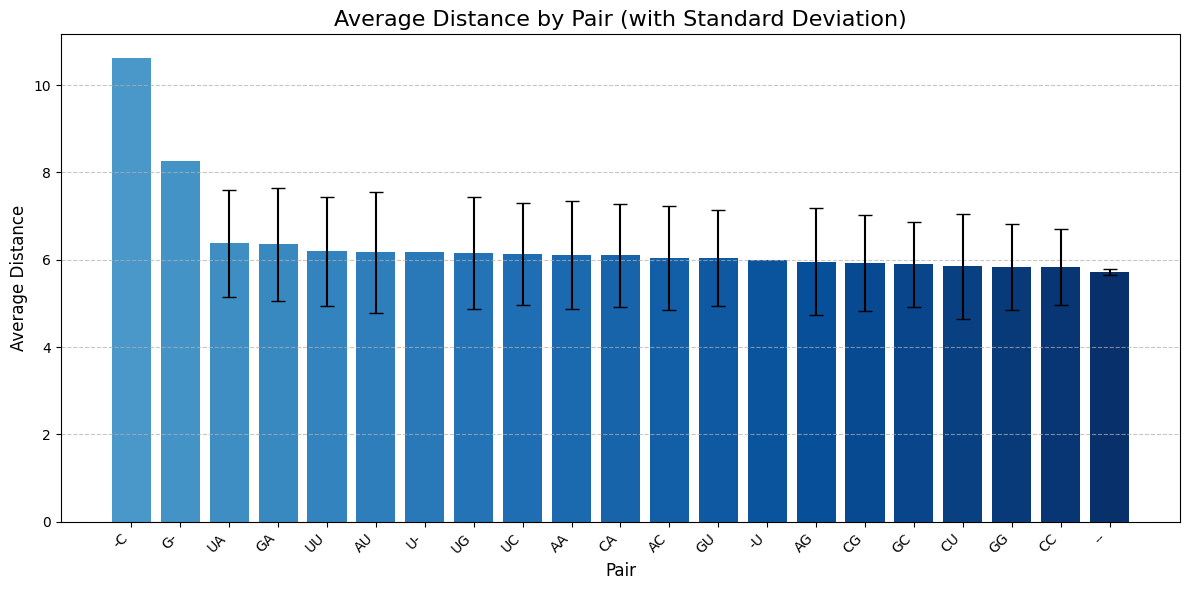

In [24]:
# Calculate mean and standard deviation
mean_dist = df_data_distances.groupby("pair")["distance"].mean(numeric_only=True)
std_dist = df_data_distances.groupby("pair")["distance"].std(numeric_only=True)

# Sort by mean for consistency
mean_dist = mean_dist.sort_values(ascending=False)
std_dist = std_dist[mean_dist.index]  # reindex to match order

# Set up distinct colors
num_pairs = len(mean_dist)
cmap = colormaps['Blues']
colors = [cmap(0.6 + 0.4 * i / max(num_pairs - 1, 1)) for i in range(num_pairs)]  # dark blues only

# Plot
plt.figure(figsize=(12, 6))
plt.bar(mean_dist.index, mean_dist.values, yerr=std_dist.values, color=colors, capsize=5)

# Styling
plt.title("Average Distance by Pair (with Standard Deviation)", fontsize=16)
plt.xlabel("Pair", fontsize=12)
plt.ylabel("Average Distance", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


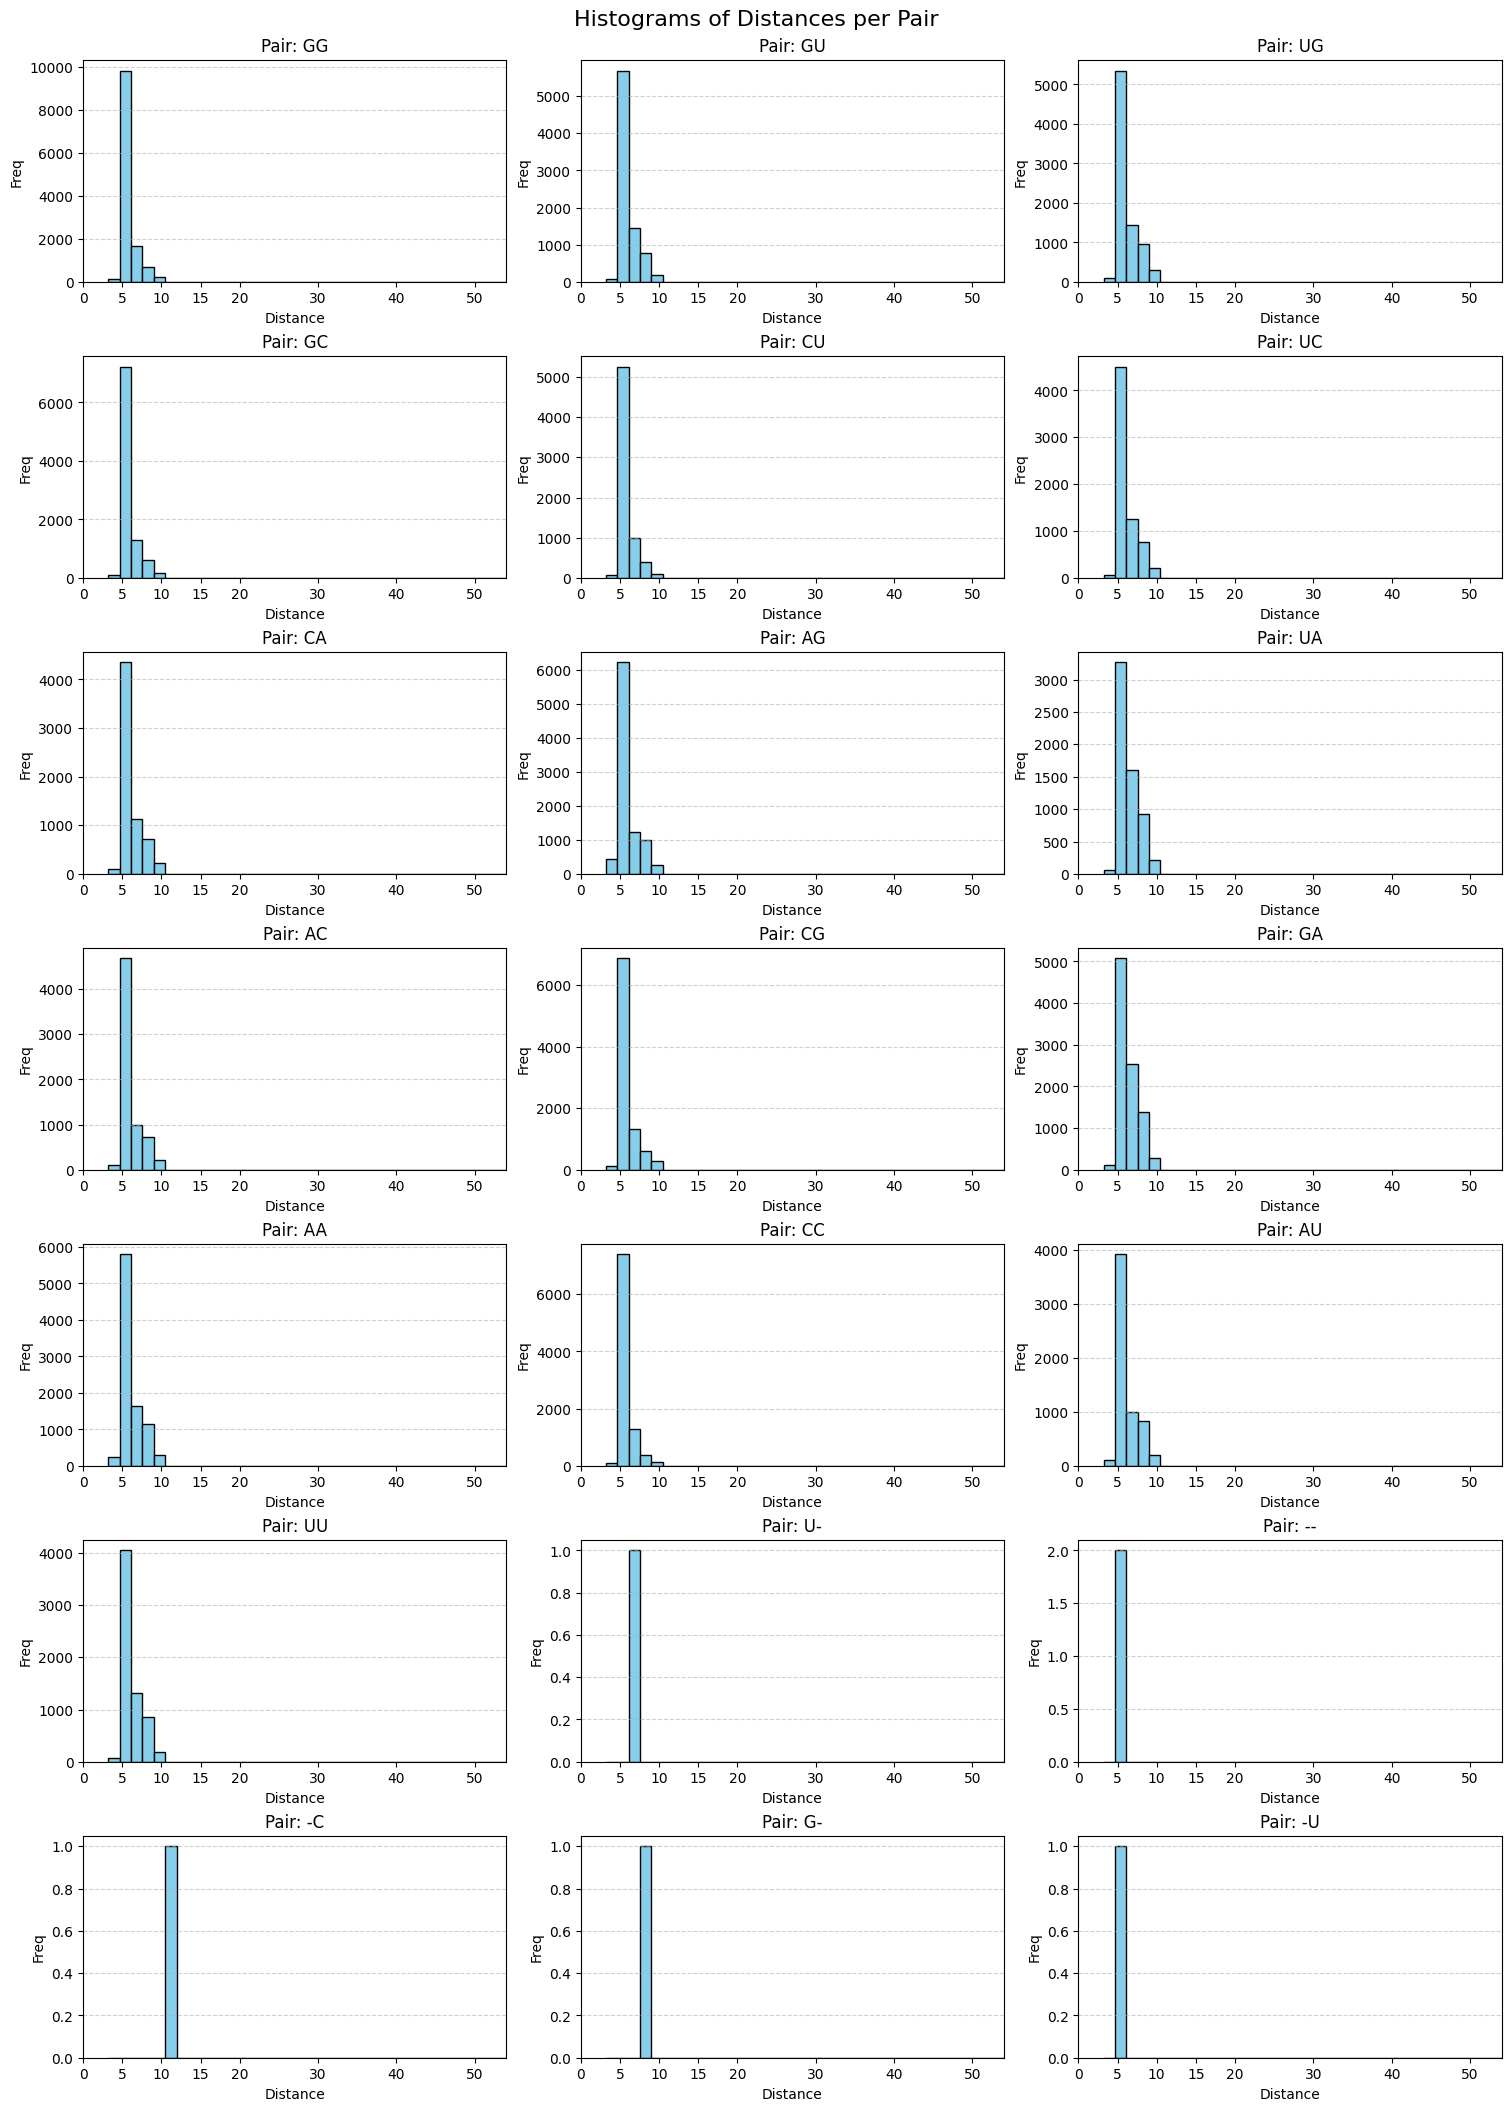

In [25]:

num_bins = 35
pairs = df_data_distances["pair"].unique()
num_pairs = len(pairs)

# Global min/max for bins
xmin = df_data_distances["distance"].min()
xmax = df_data_distances["distance"].max()
bins = np.linspace(xmin, xmax, num_bins + 1)

# Subplot grid size (adjust if you want)
ncols = 3
nrows = int(np.ceil(num_pairs / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 3), constrained_layout=True)

# Flatten axes array for easy indexing
axes = axes.flatten()

for i, pair in enumerate(pairs):
    subset = df_data_distances[df_data_distances["pair"] == pair]["distance"].dropna()
    
    if subset.empty:
        axes[i].axis('off')
        continue

    axes[i].hist(subset, bins=bins, color='skyblue', edgecolor='black')
    axes[i].set_xlim(xmin, xmax)
    axes[i].set_title(f"Pair: {pair}")
    axes[i].set_xlabel("Distance")
    axes[i].set_ylabel("Freq")
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    
    # Optional: log scale to show small+big frequencies better
    # axes[i].set_yscale('log')
    
    # Optional: zoom in visually with a "broken axis" effect
    axes[i].set_xticks([0, 5, 10, 15, 20, 30, 40, 50])

# Turn off empty subplots (if pairs < nrows*ncols)
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.suptitle("Histograms of Distances per Pair", fontsize=16)
plt.show()

In [26]:
df_data_distances[df_data_distances["distance"] >20]


,index,pair,distance
11896,12183,AU,54.051769
11956,12243,GA,51.312574
21297,21680,GG,26.764821
61985,62439,UG,23.492854
80304,80850,CC,23.009383
80923,81479,UG,38.608455
105610,106260,UU,31.702666
105618,106268,AG,25.014705
105634,106284,CU,21.230613
105661,106311,CU,43.667175


In [27]:
train_label_raw.iloc[12182:12186]


,ID,resname,resid,x_1,y_1,z_1
12182,2ZJQ_X_247,A,247,15.635000,201.746994,86.362999
12183,2ZJQ_X_248,A,248,17.365000,206.660995,82.984001
12184,2ZJQ_X_249,U,249,-19.386999,167.972000,91.588997
12185,2ZJQ_X_250,C,250,-17.052000,165.634995,96.439003


In [28]:

def angle_theta(df):

    j = 0

    x1_first = df["x_1"].iloc[j]
    y1_first = df["y_1"].iloc[j]
    z1_first = df["z_1"].iloc[j]
    
    j = 1
    
    x1_second = df["x_1"].iloc[j]
    y1_second = df["y_1"].iloc[j]
    z1_second = df["z_1"].iloc[j]

    j = 2

    x1_third = df["x_1"].iloc[j]
    y1_third = df["y_1"].iloc[j]
    z1_third = df["z_1"].iloc[j]
    
        
    # Define vectors to the 3 consecutive C-1 atoms
    v_c1 = np.array([x1_first, y1_first, z1_first])
    v_c2 = np.array([x1_second, y1_second, z1_second])
    v_c3 = np.array([x1_third, y1_third, z1_third])
    
    # vector connecting the C-1 and C-2 as well as the vector connecting C-3 and C-2
    v1 = v_c1 - v_c2
    v2 = v_c3 - v_c2
    
    # Dot product between the two vectors
    dot_product = np.dot(v1, v2)
    
    # Norms (magnitudes)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    
    # Angle in radians
    theta_rad = np.arccos(dot_product / (norm_v1 * norm_v2))
    
    # Angle in degrees
    theta_deg = np.degrees(theta_rad)
    
    return theta_deg

In [29]:
angle_theta(train_label_raw)


np.float64(123.44247722161087)

In [30]:
def three_letter_identification(df, i):
    return df["resname"][i] + df["resname"][i+1] + df["resname"][i+2]

three_letter_identification(train_label_raw, 0)

'GGG'

In [31]:
L_index = list()
L_3_Letters = list()
L_angle = list()
L_data_angle = list()


# Go through the entire dataset row by row
for i in range(0, len(train_label_raw) - 2):

    # Check that the 3 consecutive C-1 atoms are part of the same RNA chain
    condition_1 = train_label_raw["resid"].iloc[i] == (train_label_raw["resid"].iloc[(i+1)] - 1)
    condition_2 = train_label_raw["resid"].iloc[(i+1)] == (train_label_raw["resid"].iloc[(i+2)] - 1)
    
    if (condition_1 and condition_2):

        # Store the index
        L_index.append(i)

        # Store the 3 consecutive letters 
        L_3_Letters.append(three_letter_identification(train_label_raw[i:(i+3)], i))

        # Store the Euclidean distance between the 3 consecutive letters
        L_angle.append(angle_theta(train_label_raw[i:(i+3)]))

        # Make a list of list containing the index, the 2 consecutive letters and the Euclidean distance
        L_data_angle.append([i, three_letter_identification(train_label_raw[i:(i+3)], i), angle_theta(train_label_raw[i:(i+3)])])

In [32]:
L_data_angle[:10]

[[0, 'GGG', np.float64(123.44247722161087)],
 [1, 'GGU', np.float64(163.6666933595057)],
 [2, 'GUG', np.float64(144.62275716990248)],
 [3, 'UGC', np.float64(154.2681214309233)],
 [4, 'GCU', np.float64(127.63681466307705)],
 [5, 'CUC', np.float64(143.99371466990422)],
 [6, 'UCA', np.float64(112.97553386137885)],
 [7, 'CAG', np.float64(167.77605394428613)],
 [8, 'AGU', np.float64(68.7484388196889)],
 [9, 'GUA', np.float64(140.66556045475505)]]

In [33]:

df_data_angles_raw = pd.DataFrame(L_data_angle)
df_data_angles_raw.columns = ["index","3-Letters","angle"]
df_data_angles_raw

,index,3-Letters,angle
0,0,GGG,123.442477
1,1,GGU,163.666693
2,2,GUG,144.622757
3,3,UGC,154.268121
4,4,GCU,127.636815
...,...,...,...
135402,137088,UUU,NaN
135403,137089,UUC,NaN
135404,137090,UCA,NaN
135405,137091,CAU,NaN


In [34]:
df_data_angles = df_data_angles_raw[df_data_angles_raw["angle"] == df_data_angles_raw["angle"]]
df_data_angles

,index,3-Letters,angle
0,0,GGG,123.442477
1,1,GGU,163.666693
2,2,GUG,144.622757
3,3,UGC,154.268121
4,4,GCU,127.636815
...,...,...,...
135382,137068,UUU,147.219684
135383,137069,UUA,150.326783
135384,137070,UAC,154.349082
135385,137071,ACC,152.847185


In [35]:
grouped = df_data_angles.groupby("3-Letters")["angle"].mean(numeric_only=True)
grouped = grouped.sort_values(ascending=False)
grouped

3-Letters
--U    156.207072
U--    149.451407
CCC    143.193814
GGG    142.809904
GCC    141.516486
          ...    
UAA    120.744957
--C    109.578078
GG-    104.643940
G--     74.796812
-CU     53.853024
Name: angle, Length: 71, dtype: float64

<Figure size 1200x600 with 0 Axes>

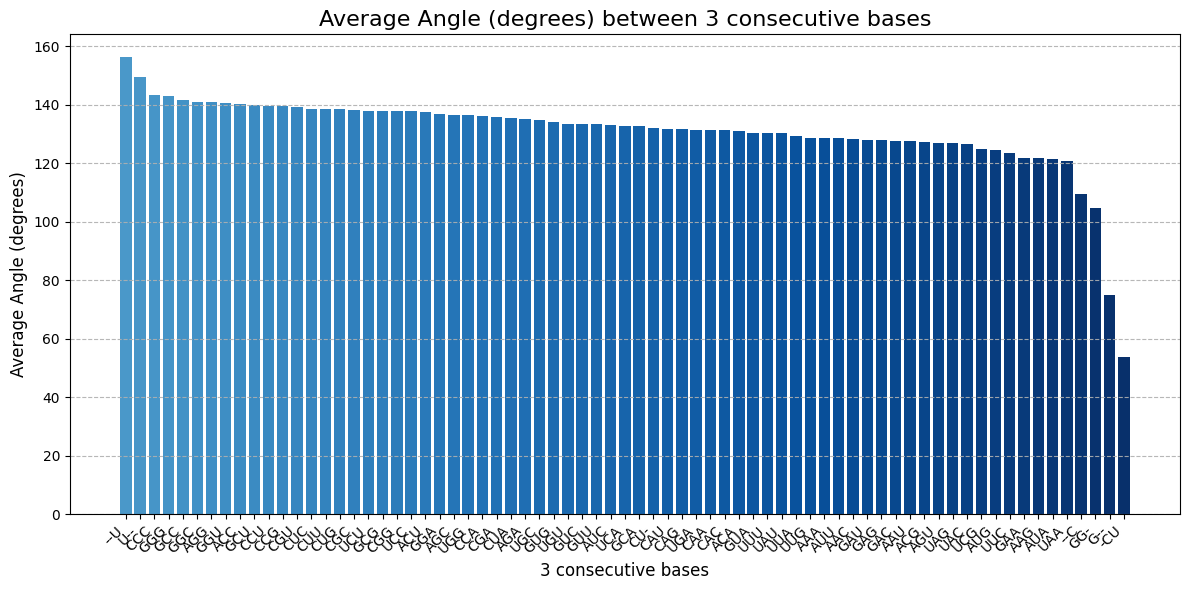

In [42]:
plt.figure(figsize=(12, 6))
num_pairs = len(grouped)
cmap = colormaps['Blues']
colors = [cmap(0.6 + 0.4 * i / max(num_pairs - 1, 1)) for i in range(num_pairs)]  # dark blues only

# Plot
plt.figure(figsize=(12, 6))
plt.bar(grouped.index, grouped.values, color=colors)

# Styling
plt.title("Average Angle (degrees) between 3 consecutive bases", fontsize=16)
plt.xlabel("3 consecutive bases", fontsize=12)
plt.ylabel("Average Angle (degrees)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.tight_layout()

plt.show()

Total unique pairs: 71


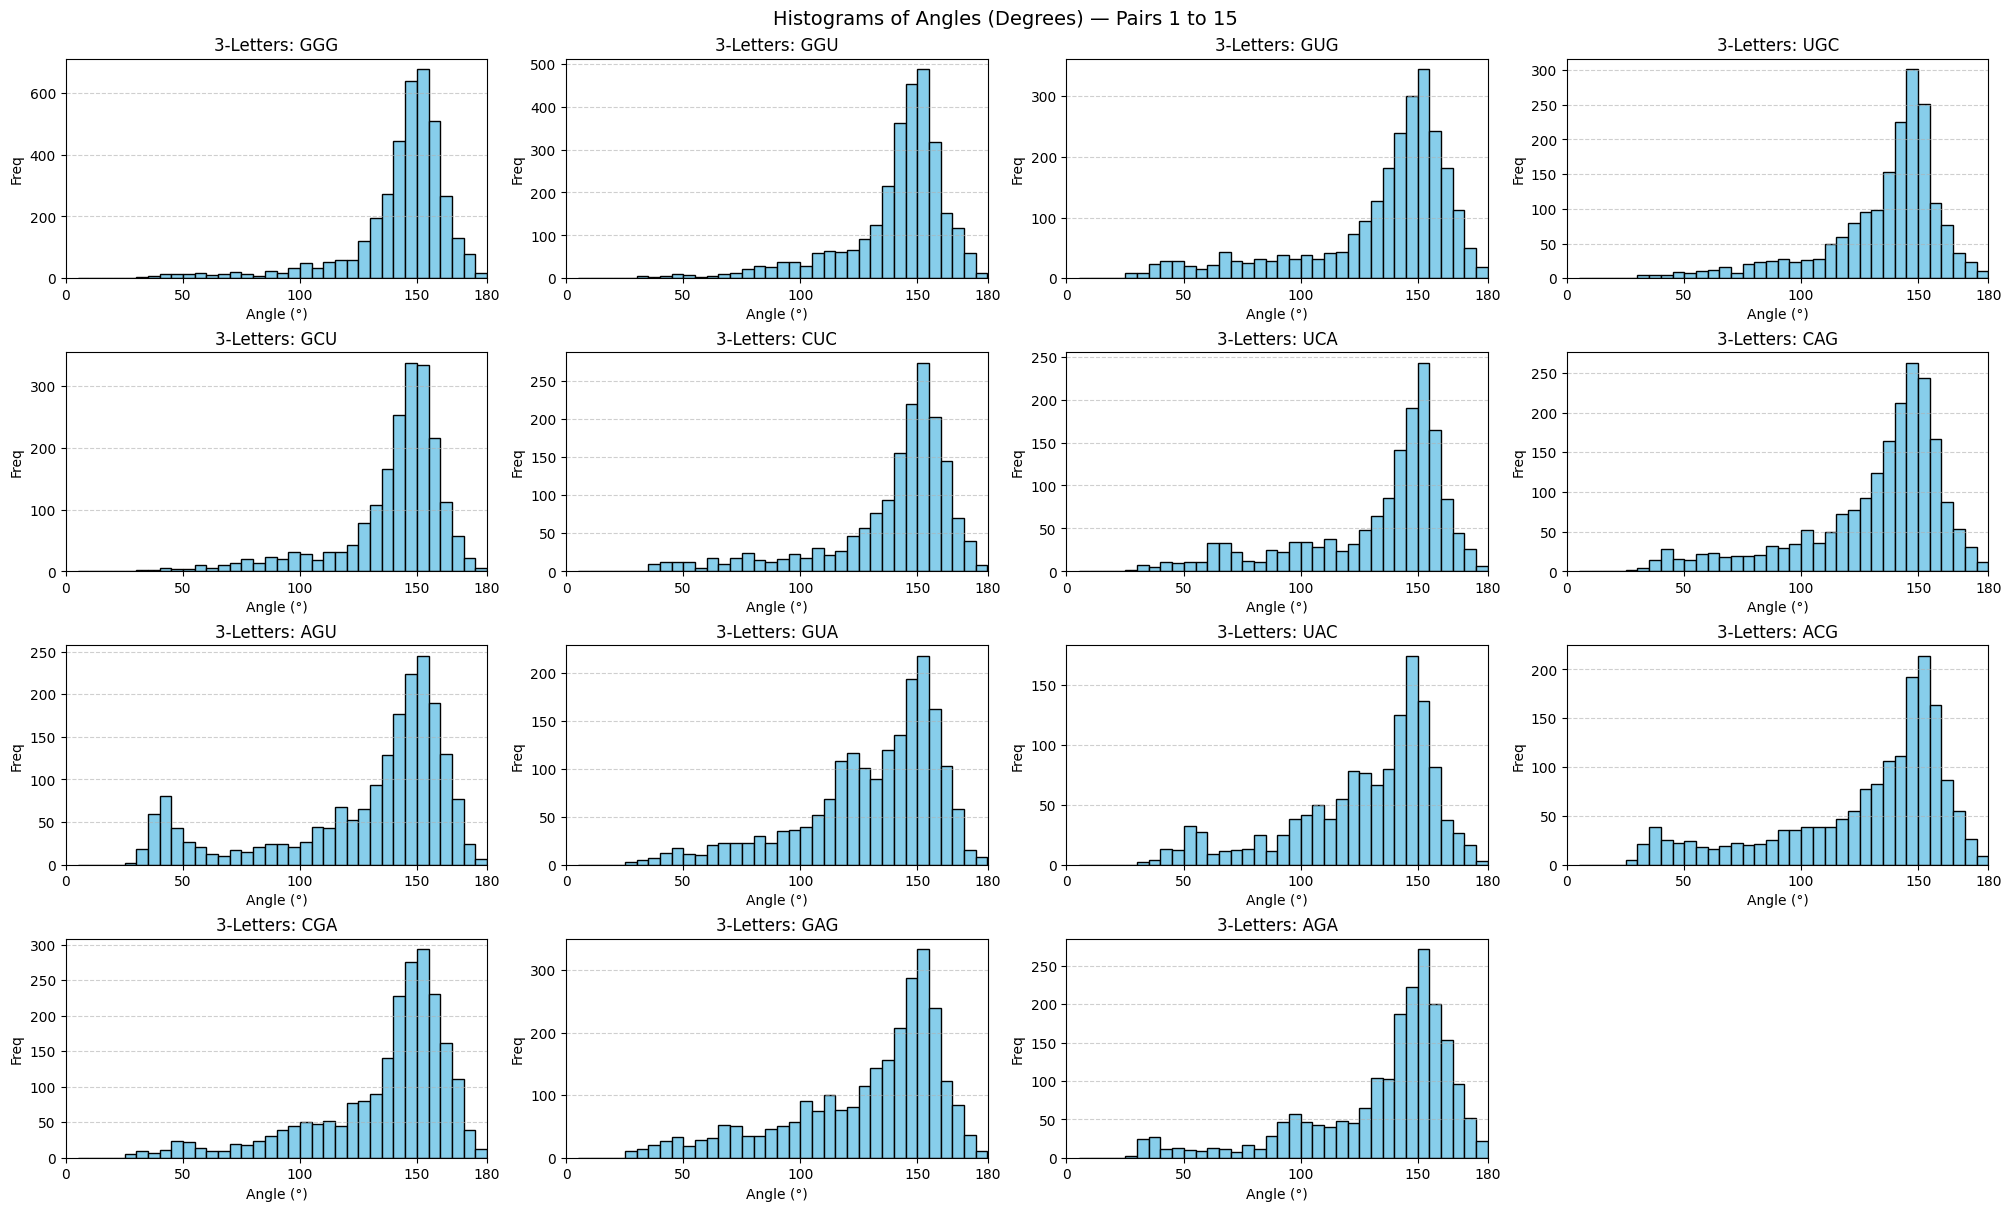

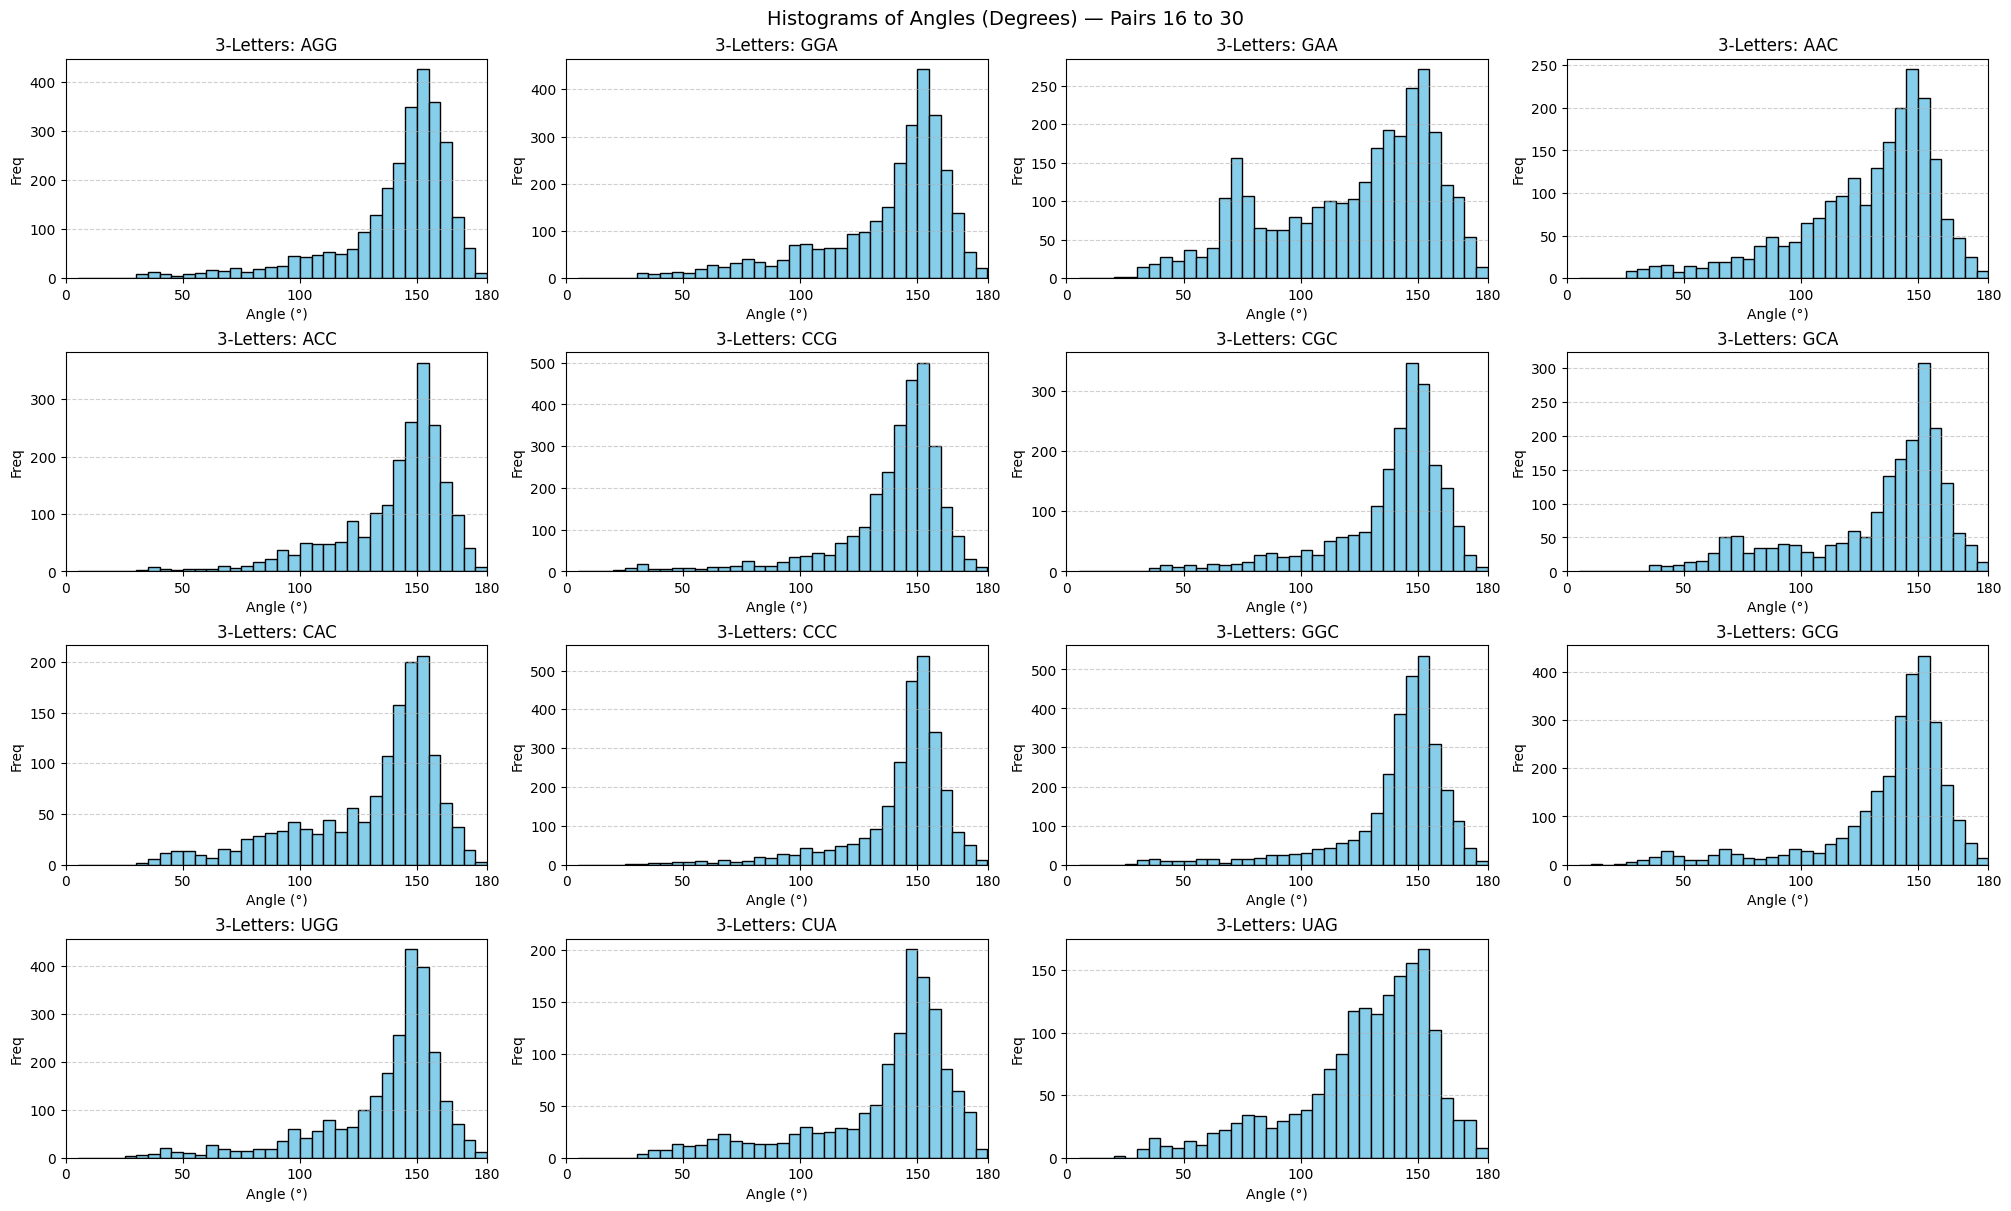

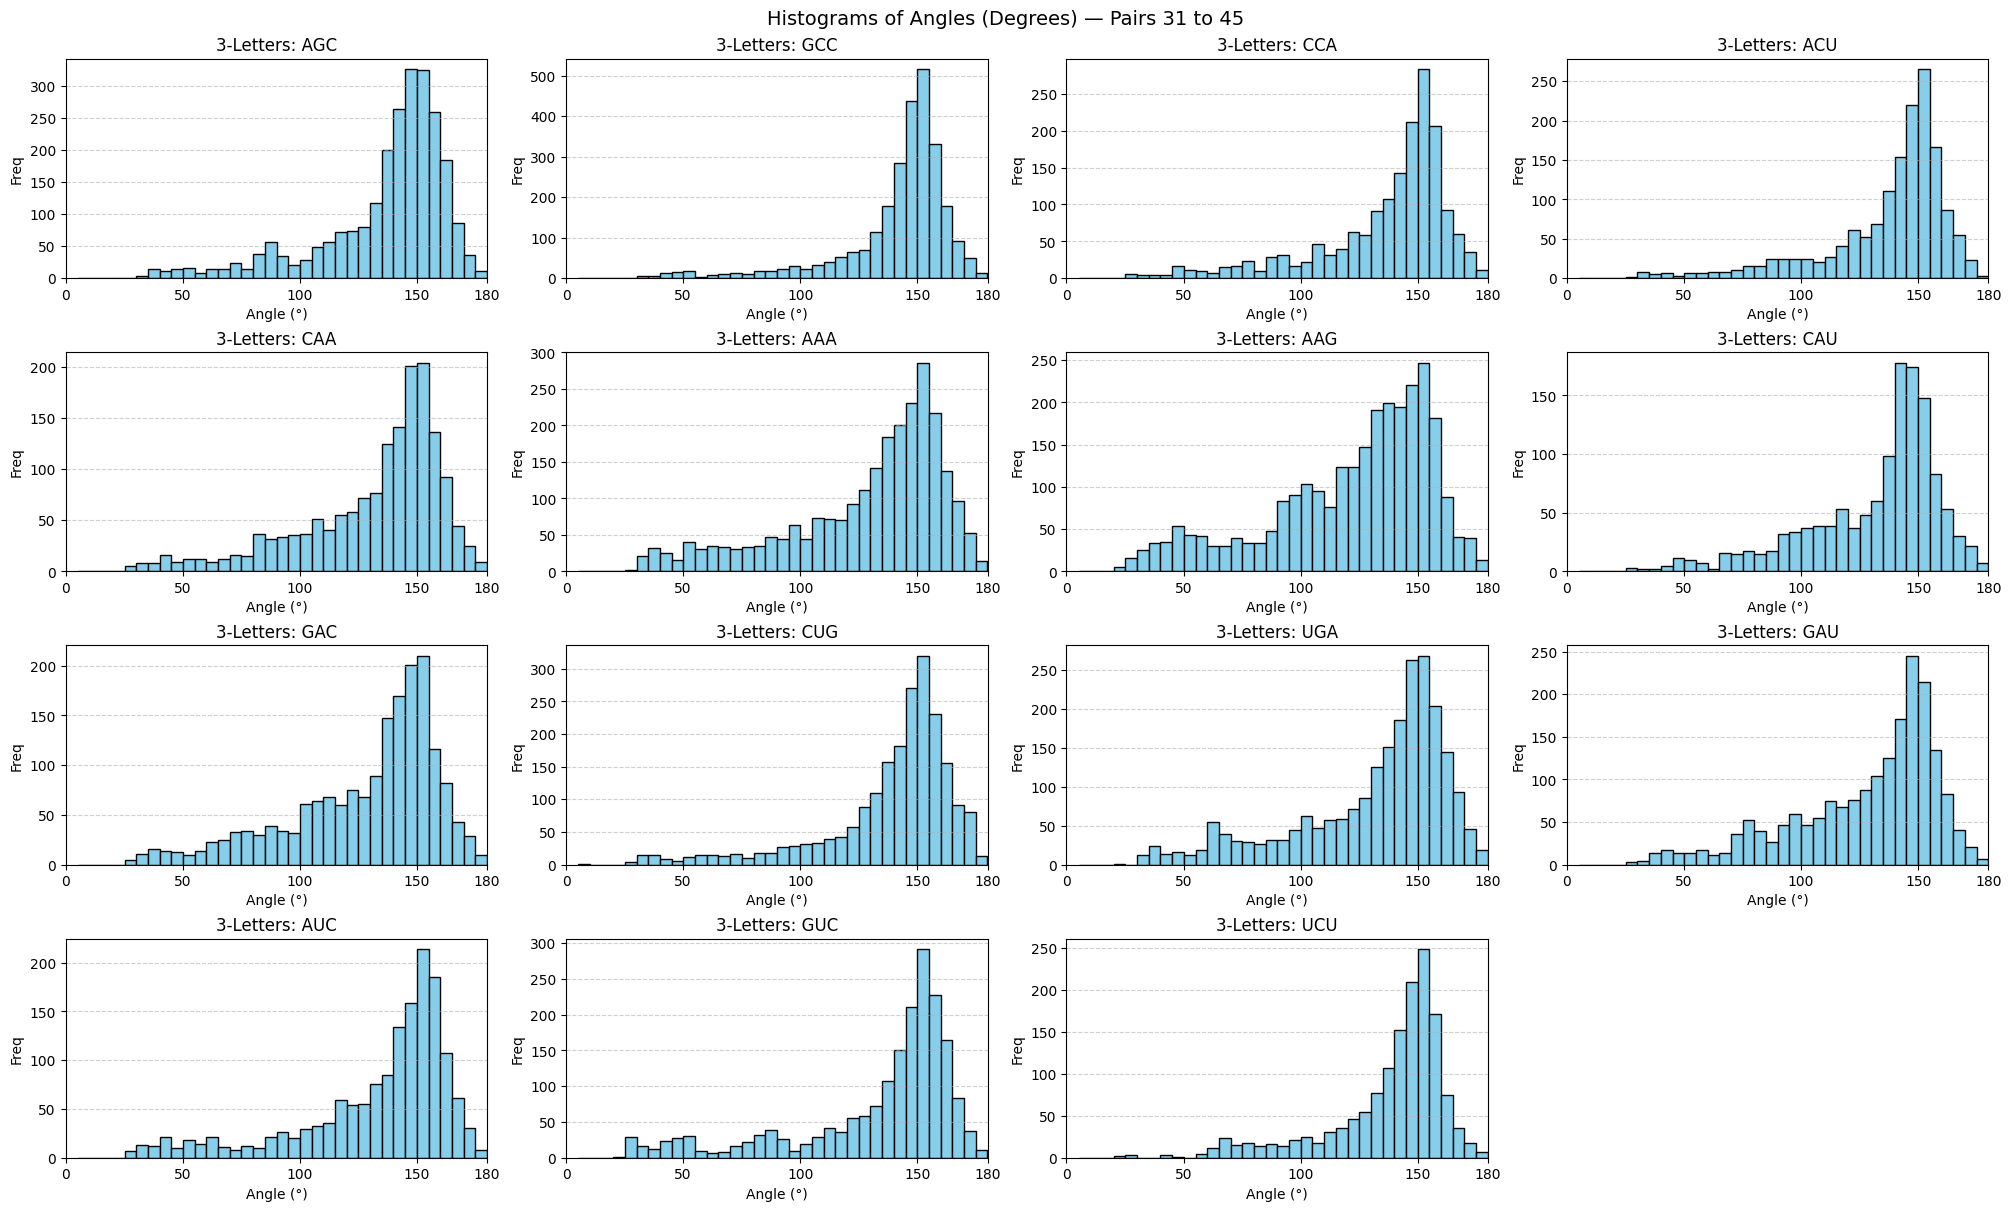

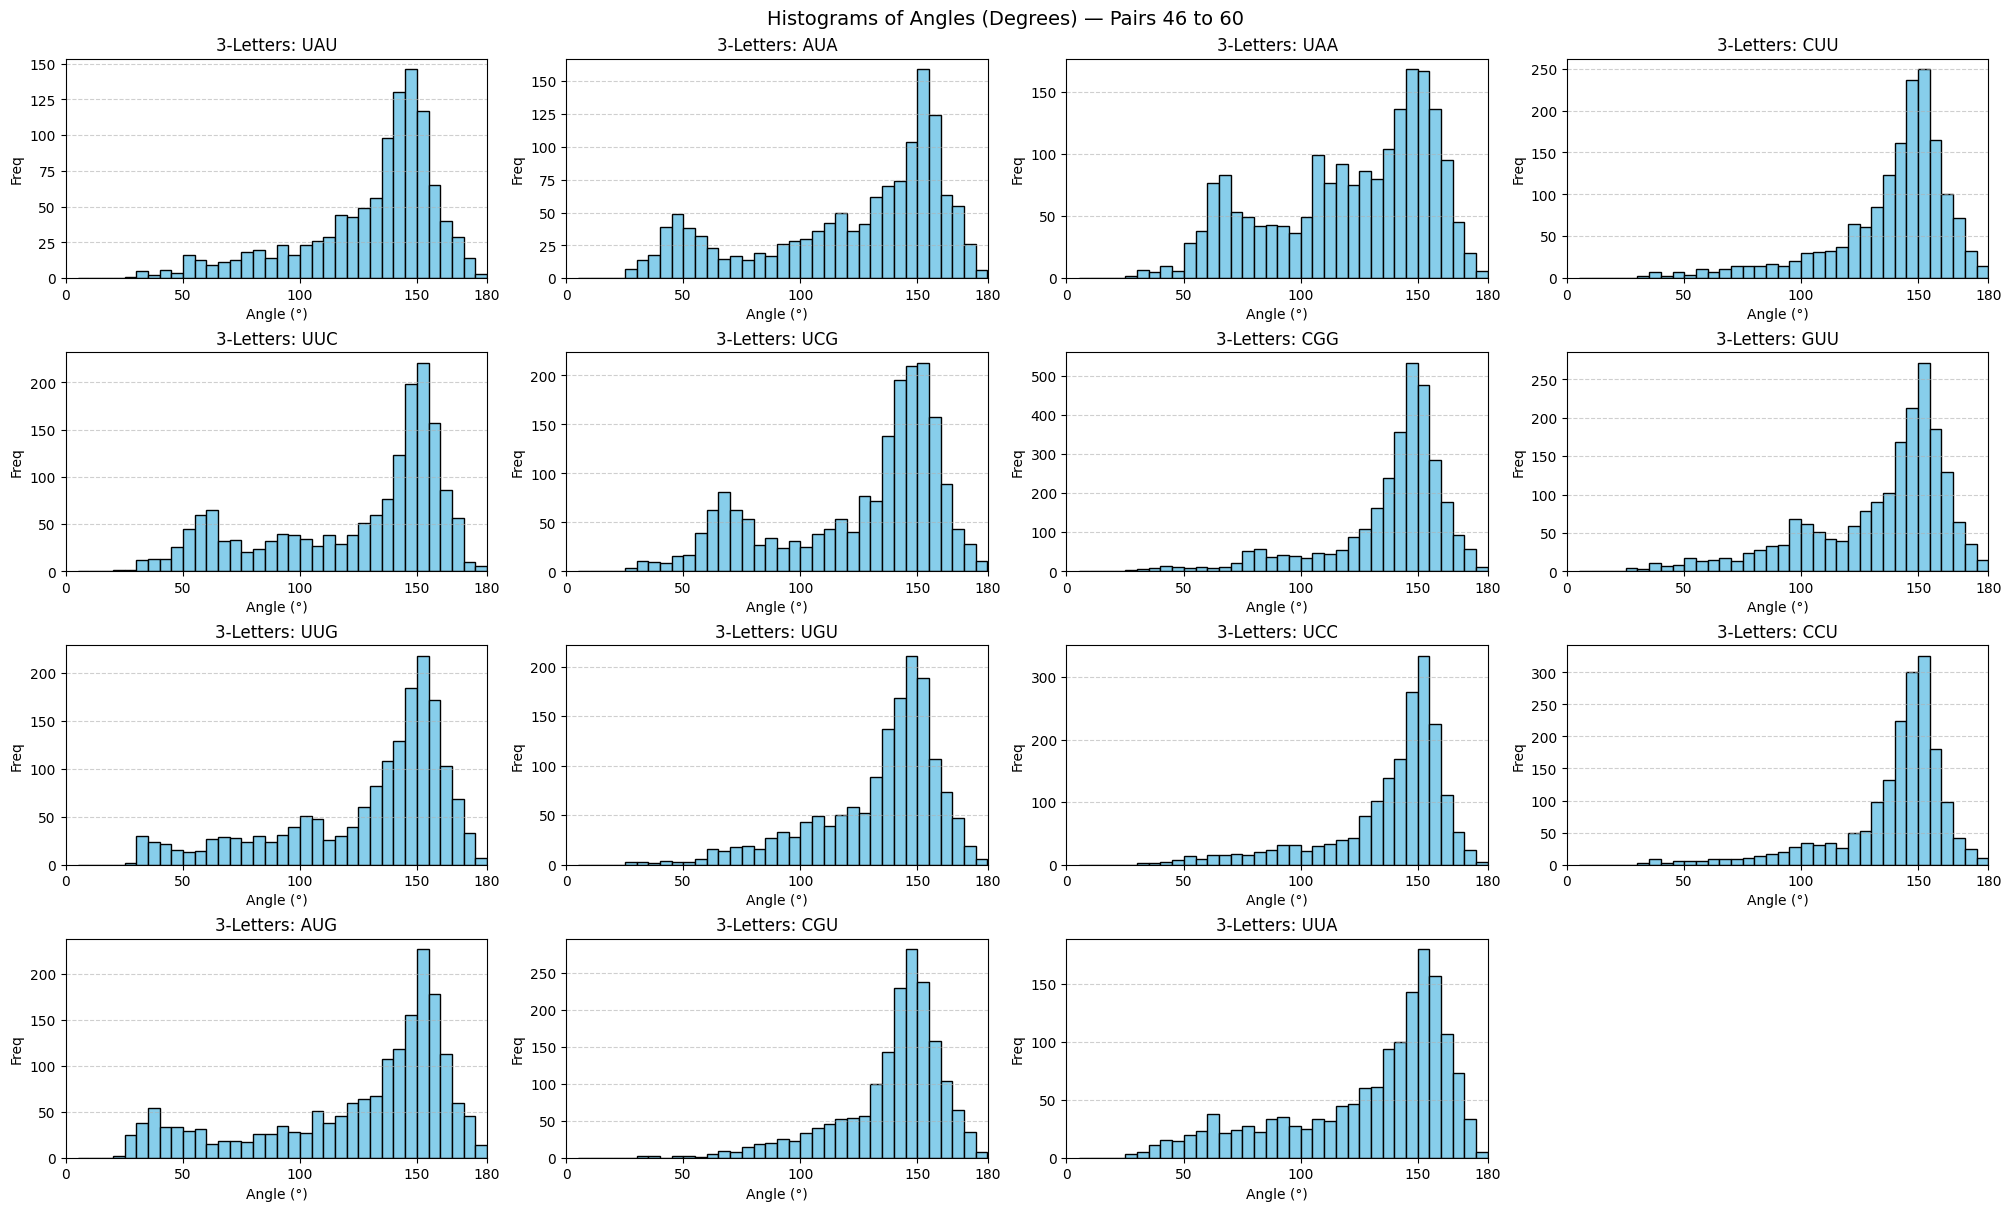

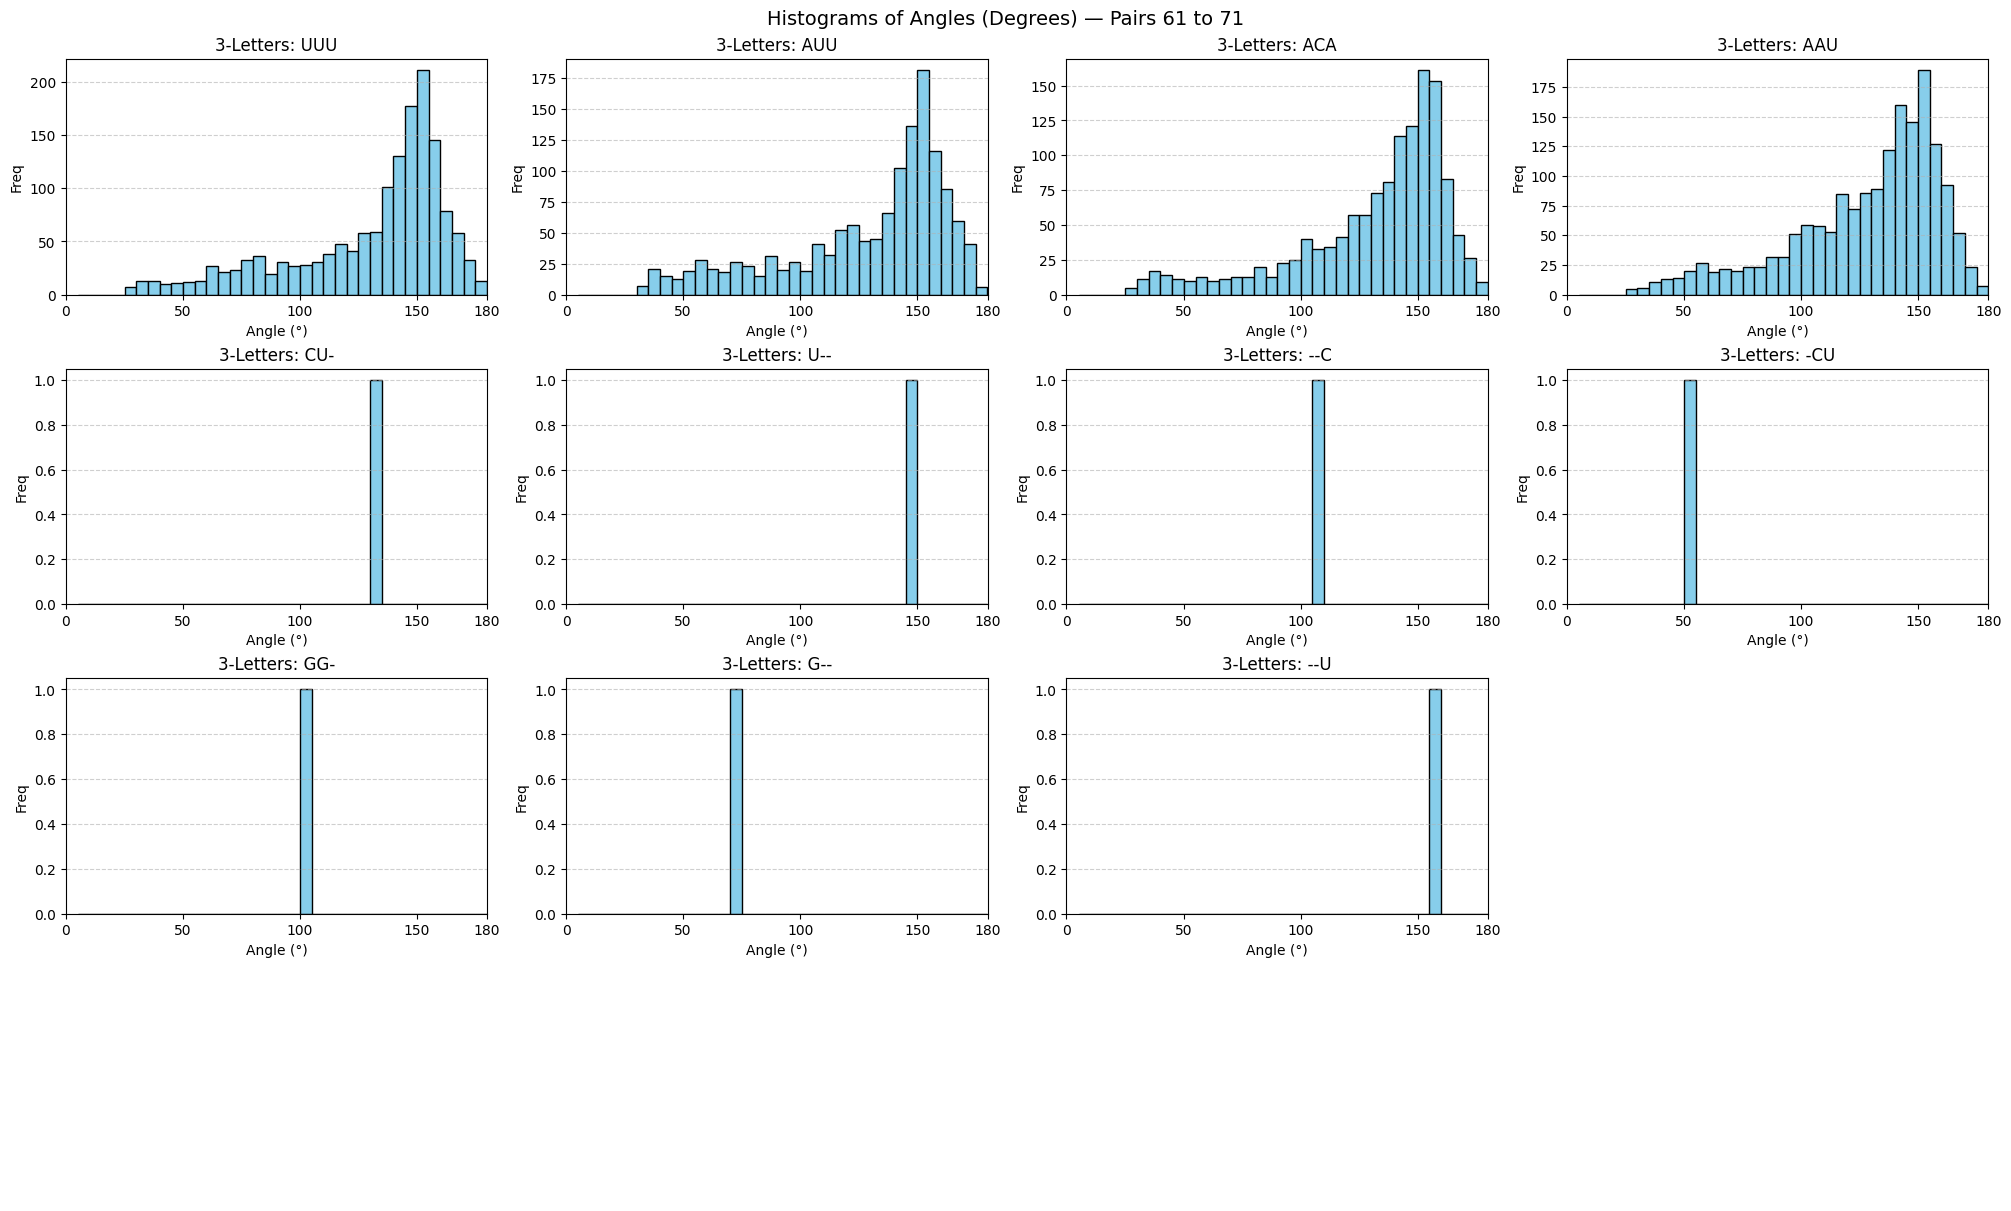

In [ ]:

num_bins = 35
unique_pairs = df_data_angles["3-Letters"].unique()
num_plots = len(unique_pairs)

# Global min/max for consistent bins
xmin = df_data_angles["angle"].min()
xmax = df_data_angles["angle"].max()
bins = np.linspace(xmin, xmax, num_bins + 1)

# Subplot config
plots_per_fig = 15
ncols = 4
nrows = int(np.ceil(plots_per_fig / ncols))

# Loop over chunks of pairs
for chunk_start in range(0, num_plots, plots_per_fig):
    chunk_pairs = unique_pairs[chunk_start:chunk_start + plots_per_fig]
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 3), constrained_layout=True)
    axes = axes.flatten()

    for i, pair in enumerate(chunk_pairs):
        subset = df_data_angles[df_data_angles["3-Letters"] == pair]["angle"].dropna()
        
        if subset.empty:
            axes[i].axis('off')
            continue

        axes[i].hist(subset, bins=bins, color='skyblue', edgecolor='black')
        axes[i].set_xlim(xmin, xmax)
        axes[i].set_title(f"3-Letters: {pair}")
        axes[i].set_xlabel("Angle (°)")
        axes[i].set_ylabel("Freq")
        axes[i].grid(axis='y', linestyle='--', alpha=0.6)
        axes[i].set_xticks([0, 50, 100, 150, 180])

    # Turn off unused subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.suptitle(f"Histograms of Angles (Degrees) — Pairs {chunk_start + 1} to {chunk_start + len(chunk_pairs)}", fontsize=14)
    plt.show()

# ---------------


In [51]:
base_path = "src/data/stanford-rna-3d-folding"

def debug_load(file_name):
    path = f"{base_path}/{file_name}"
    print(f"\nLoading {file_name}...")
    if not os.path.exists(path):
        print(f"File not found: {path}")
        return None
    
    df = pd.read_csv(path)
    print(f"Loaded {len(df)} rows")
    print("Sample data:")
    display(df.head(2))
    print("Columns:", df.columns.tolist())
    return df


# Load all files with debugging
print("===== Loading Data Files =====")
train_seq = debug_load("train_sequences.csv")
train_labels = debug_load("train_labels.csv")
val_seq = debug_load("validation_sequences.csv")
val_labels = debug_load("validation_labels.csv")
test_seq = debug_load("test_sequences.csv")

# Verify merge keys exist
print("\n===== Checking Merge Keys =====")
for df, name in [(train_seq, "train_seq"), (train_labels, "train_labels"),
                 (val_seq, "val_seq"), (val_labels, "val_labels")]:
    if df is not None:
        print(f"{name} has 'target_id' column: {'target_id' in df.columns}")

# Standardize column names
if train_labels is not None and 'ID' in train_labels.columns:
    train_labels.rename(columns={'ID': 'target_id'}, inplace=True)
if val_labels is not None and 'ID' in val_labels.columns:
    val_labels.rename(columns={'ID': 'target_id'}, inplace=True)

# Merge with intersection to ensure valid matches
print("\n===== Merging Data =====")
def safe_merge(left, right, name):
    if left is None or right is None:
        print(f"Cannot merge {name} - one or both DataFrames are None")
        return None
    
    common_ids = set(left['target_id']).intersection(set(right['target_id']))
    print(f"{name}: {len(common_ids)} common target_ids")
    
    merged = pd.merge(left, right, on='target_id', how='inner')
    print(f"Merged {len(merged)} rows (from {len(left)} + {len(right)})")
    if len(merged) > 0:
        print("Merged columns:", merged.columns.tolist())
    return merged   

train_data = safe_merge(train_seq, train_labels, "Training Data")
val_data = safe_merge(val_seq, val_labels, "Validation Data")

# Basic EDA only if we have data
if train_data is not None and len(train_data) > 0:
    print("\n===== Available Columns for EDA =====")
    print(train_data.columns.tolist())
    
    # Sequence length distribution
    if 'sequence' in train_data.columns:
        plt.figure(figsize=(12, 6))
        train_data['sequence'].str.len().hist(bins=30)
        plt.title('Sequence Length Distribution')
        plt.xlabel('Length')
        plt.ylabel('Count')
        plt.show()
    
    # Residue distribution if column exists
    if 'resname' in train_data.columns:
        plt.figure(figsize=(12, 6))
        sns.countplot(x=train_data['resname'].dropna())
        plt.title('Residue Distribution')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("'resname' column not found for distribution plot")
else:
    print("\nNo training data available for EDA")

# Only proceed with modeling if we have valid data
if (train_data is not None and len(train_data) > 0 and 
    test_seq is not None and len(test_seq) > 0):
    
    print("\n===== Preparing Baseline Model =====")
    # Prepare features (using sequence length)
    train_data['seq_length'] = train_data['sequence'].str.len()
    test_seq['seq_length'] = test_seq['sequence'].str.len()
    
    # Train simple model
    from sklearn.neighbors import KNeighborsRegressor
    knn = KNeighborsRegressor(n_neighbors=3)
    knn.fit(train_data[['seq_length']], train_data[['x_1', 'y_1', 'z_1']])
    
    # Make predictions
    preds = knn.predict(test_seq[['seq_length']])
    
    # Create submission
    submission = pd.DataFrame({
        'ID': test_seq['target_id'] + "_centroid",
        'x_1': preds[:, 0],
        'y_1': preds[:, 1],
        'z_1': preds[:, 2]     
        })
    submission.to_csv("/kaggle/working/submission.csv", index=False)
    print("Submission saved:")
    display(submission.head())
else:
    print("\nInsufficient data for modeling")


===== Loading Data Files =====

Loading train_sequences.csv...
Loaded 844 rows
Sample data:


,target_id,sequence,temporal_cutoff,description,all_sequences
0,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,1995-01-26,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...
1,1RNK_A,GGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU,1995-02-27,THE STRUCTURE OF AN RNA PSEUDOKNOT THAT CAUSES...,>1RNK_1|Chain A|RNA PSEUDOKNOT|null\nGGCGCAGUG...


Columns: ['target_id', 'sequence', 'temporal_cutoff', 'description', 'all_sequences']

Loading train_labels.csv...
Loaded 137095 rows
Sample data:


,ID,resname,resid,x_1,y_1,z_1
0,1SCL_A_1,G,1,13.76,-25.974001,0.102
1,1SCL_A_2,G,2,9.31,-29.638000,2.669


Columns: ['ID', 'resname', 'resid', 'x_1', 'y_1', 'z_1']

Loading validation_sequences.csv...
Loaded 12 rows
Sample data:


,target_id,sequence,temporal_cutoff,description,all_sequences
0,R1107,GGGGGCCACAGCAGAAGCGUUCACGUCGCAGCCCCUGUCAGCCAUU...,2022-05-28,CPEB3 ribozyme\nHuman\nhuman CPEB3 HDV-like ri...,>7QR4_1|Chain A|U1 small nuclear ribonucleopro...
1,R1108,GGGGGCCACAGCAGAAGCGUUCACGUCGCGGCCCCUGUCAGCCAUU...,2022-05-27,CPEB3 ribozyme\nChimpanzee\nChimpanzee CPEB3 H...,">7QR3_1|Chains A, B|U1 small nuclear ribonucle..."


Columns: ['target_id', 'sequence', 'temporal_cutoff', 'description', 'all_sequences']

Loading validation_labels.csv...
Loaded 2515 rows
Sample data:


,ID,resname,resid,x_1,y_1,z_1,x_2,y_2,z_2,x_3,...,z_37,x_38,y_38,z_38,x_39,y_39,z_39,x_40,y_40,z_40
0,R1107_1,G,1,-5.499,8.520,8.605,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18
1,R1107_2,G,2,-5.826,10.453,14.010,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18


Columns: ['ID', 'resname', 'resid', 'x_1', 'y_1', 'z_1', 'x_2', 'y_2', 'z_2', 'x_3', 'y_3', 'z_3', 'x_4', 'y_4', 'z_4', 'x_5', 'y_5', 'z_5', 'x_6', 'y_6', 'z_6', 'x_7', 'y_7', 'z_7', 'x_8', 'y_8', 'z_8', 'x_9', 'y_9', 'z_9', 'x_10', 'y_10', 'z_10', 'x_11', 'y_11', 'z_11', 'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15', 'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19', 'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21', 'x_22', 'y_22', 'z_22', 'x_23', 'y_23', 'z_23', 'x_24', 'y_24', 'z_24', 'x_25', 'y_25', 'z_25', 'x_26', 'y_26', 'z_26', 'x_27', 'y_27', 'z_27', 'x_28', 'y_28', 'z_28', 'x_29', 'y_29', 'z_29', 'x_30', 'y_30', 'z_30', 'x_31', 'y_31', 'z_31', 'x_32', 'y_32', 'z_32', 'x_33', 'y_33', 'z_33', 'x_34', 'y_34', 'z_34', 'x_35', 'y_35', 'z_35', 'x_36', 'y_36', 'z_36', 'x_37', 'y_37', 'z_37', 'x_38', 'y_38', 'z_38', 'x_39', 'y_39', 'z_39', 'x_40', 'y_40', 'z_40']

Loading test_sequences.csv...


,target_id,sequence,temporal_cutoff,description,all_sequences
0,R1107,GGGGGCCACAGCAGAAGCGUUCACGUCGCAGCCCCUGUCAGCCAUU...,2022-05-28,CPEB3 ribozyme\nHuman\nhuman CPEB3 HDV-like ri...,>7QR4_1|Chain A|U1 small nuclear ribonucleopro...
1,R1108,GGGGGCCACAGCAGAAGCGUUCACGUCGCGGCCCCUGUCAGCCAUU...,2022-05-27,CPEB3 ribozyme\nChimpanzee\nChimpanzee CPEB3 H...,">7QR3_1|Chains A, B|U1 small nuclear ribonucle..."


Columns: ['target_id', 'sequence', 'temporal_cutoff', 'description', 'all_sequences']

===== Checking Merge Keys =====
train_seq has 'target_id' column: True
train_labels has 'target_id' column: False
val_seq has 'target_id' column: True
val_labels has 'target_id' column: False

===== Merging Data =====
Training Data: 0 common target_ids
Merged 0 rows (from 844 + 137095)
Validation Data: 0 common target_ids
Merged 0 rows (from 12 + 2515)

No training data available for EDA

Insufficient data for modeling
